In [1]:
%matplotlib widget

import re, datetime
import matplotlib.pyplot as plt

In [2]:
def read_log(log_file):
    events = []
    r = re.compile(r'^(\S+ \S+ \S+) \[info\] {REND} (enqueue_rend_request\(\): Enqueued rendezvous request with effort: (\d+). Queued requests: (\d+)\s*|handle_rend_pqueue_cb\(\): Dequeued pending rendezvous request with effort: (\d+). Waited (\d+). Remaining requests: (\d+)\s*)$')
    now = datetime.datetime.now()
    with open(log_file) as f:
        for line in f:
            m = r.match(line)
            if m:
                t = datetime.datetime.strptime(m.group(1), '%b %d %H:%M:%S.%f').replace(year=now.year)
                is_enq = m.group(3) is not None
                effort = int(m.group(3) or m.group(5))
                depth = int(m.group(4) or m.group(7))
                events.append((t, effort, depth, is_enq))
    return events

In [3]:
def plotter(events):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8))

    ax[0].plot(list(e[0] for e in events), list(e[2] for e in events), '.', label='depth')
    ax[0].set_ylabel('requests queued')
    ax[0].legend()

    ax[1].plot(list(e[0] for e in events if not e[3]), list(e[1] for e in events if not e[3]), 'x', label='dequeue')
    ax[1].plot(list(e[0] for e in events if e[3]), list(e[1] for e in events if e[3]), '.', label='enqueue')
    ax[1].set_ylabel('request effort')
    ax[1].legend()

In [4]:
events = read_log("log-20230502") 

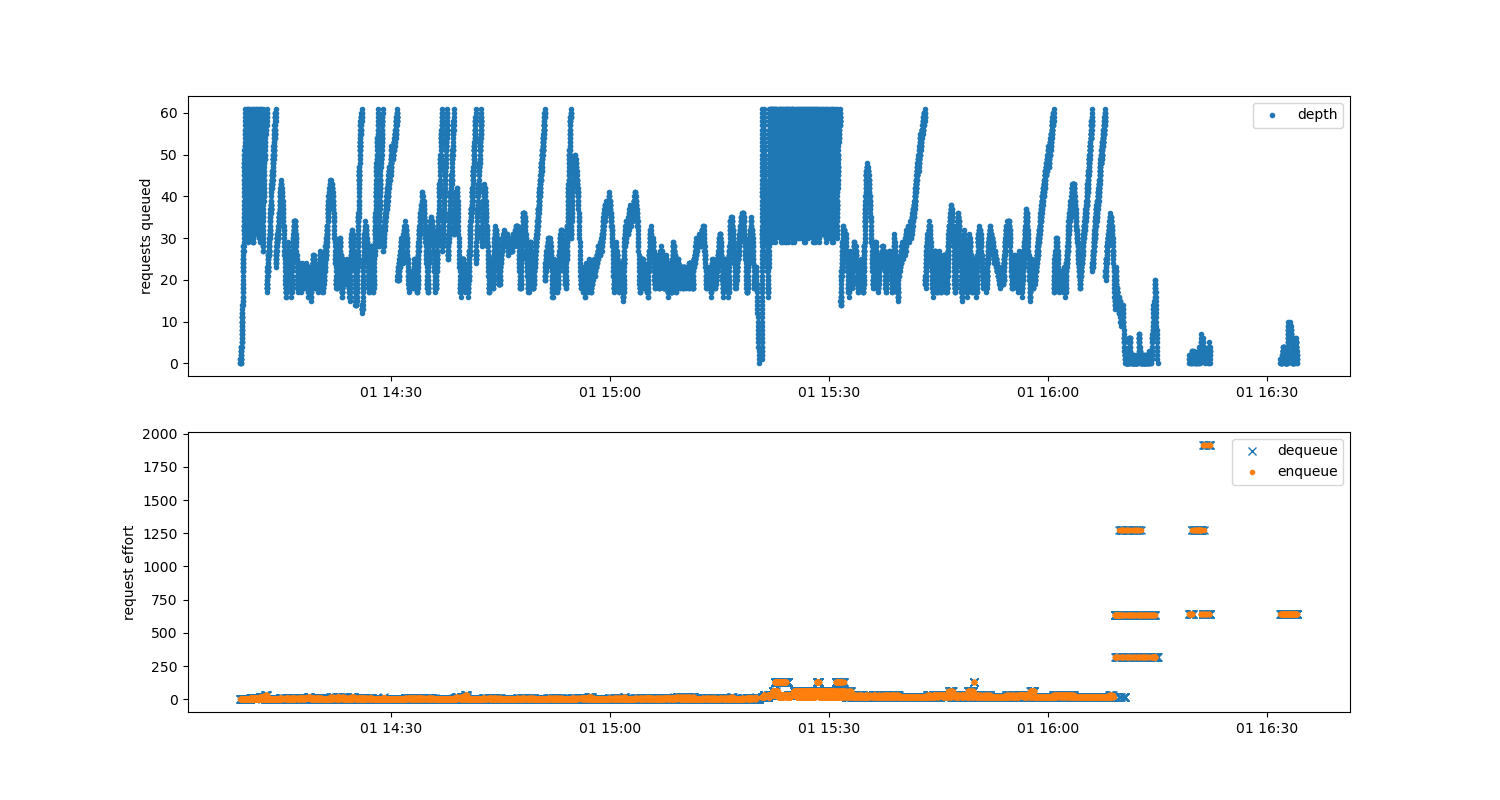

In [5]:
plotter(events)

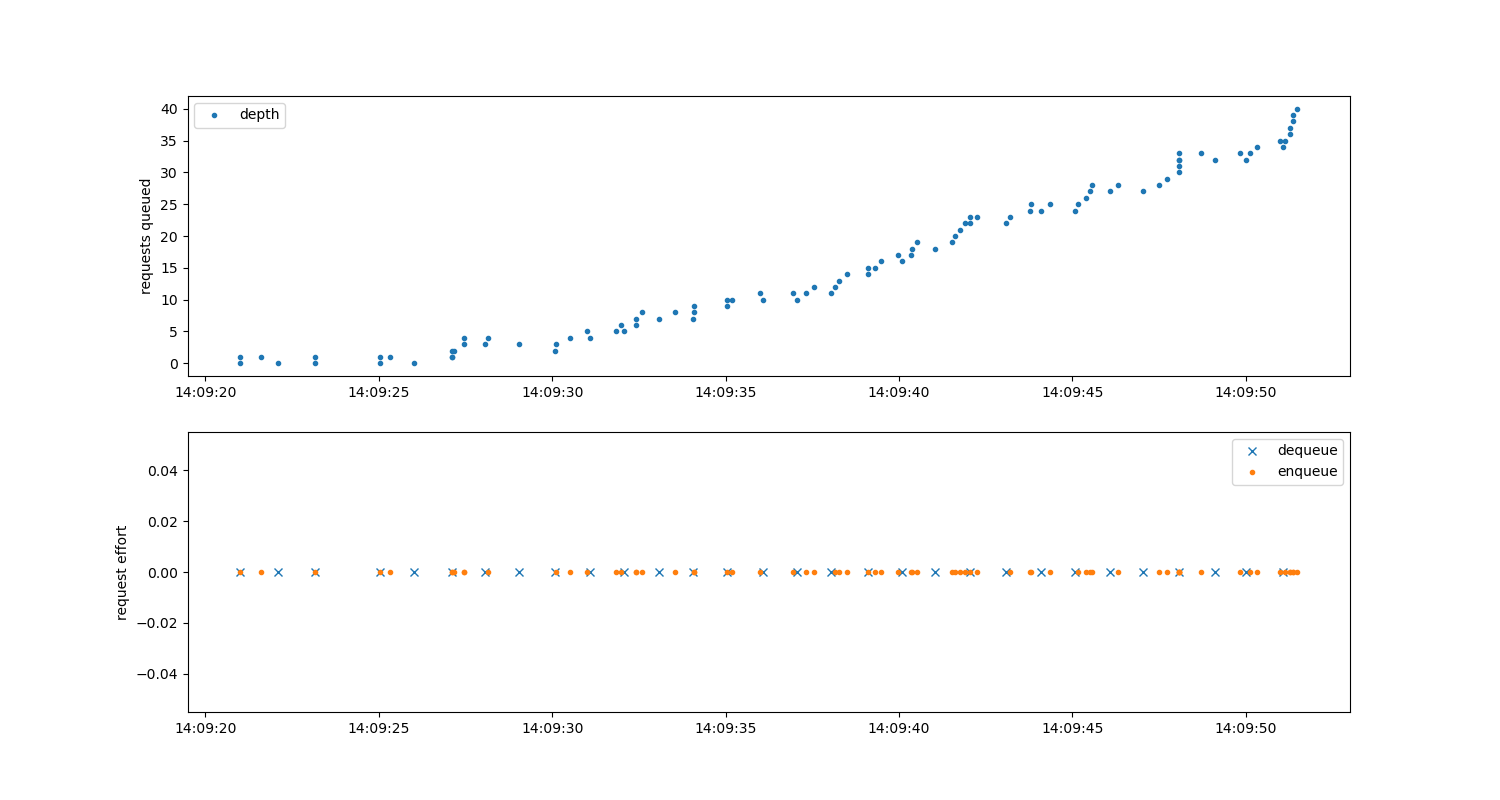

In [6]:
plotter(events[:100])

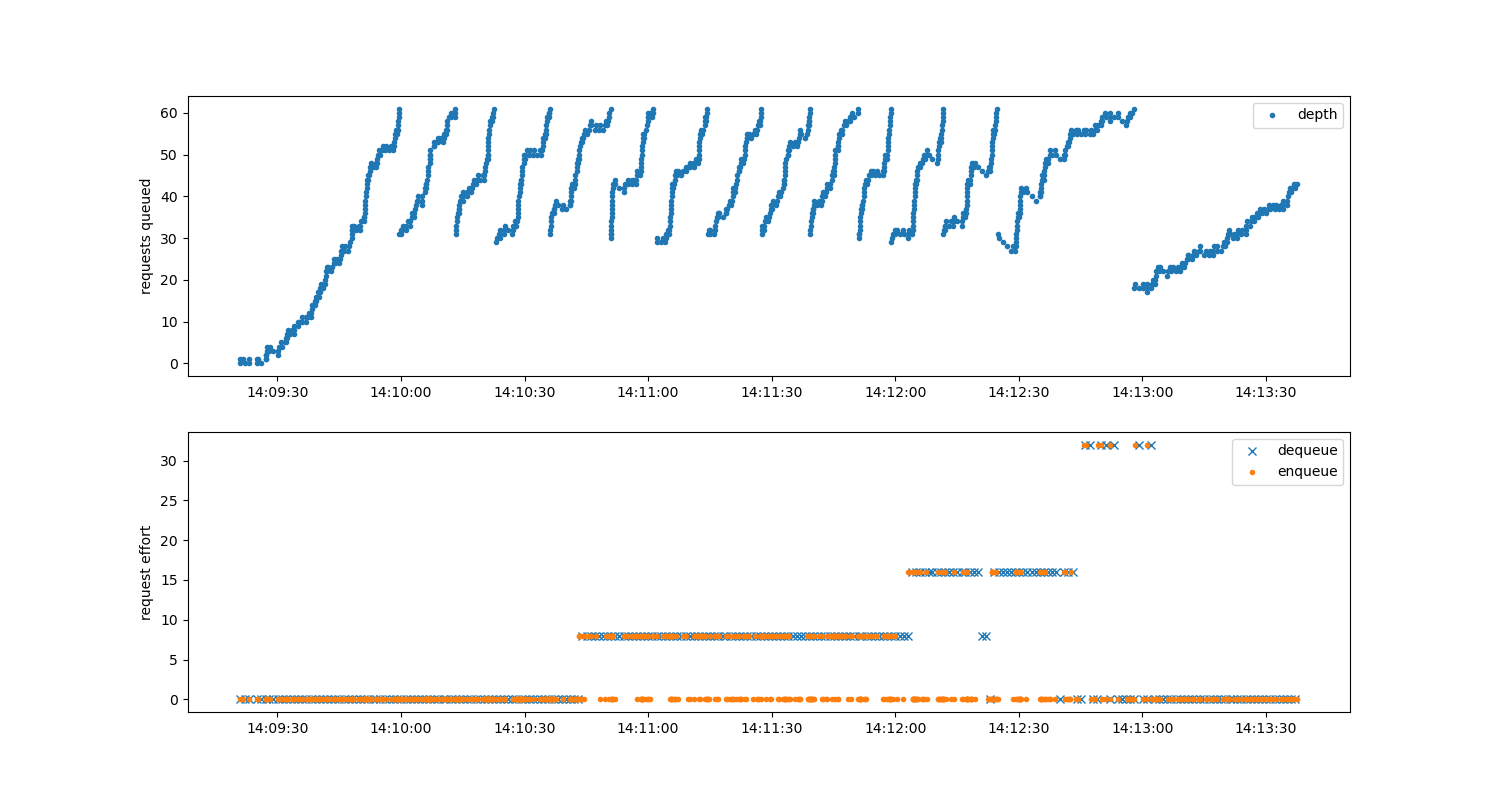

In [10]:
plotter(events[:1000])

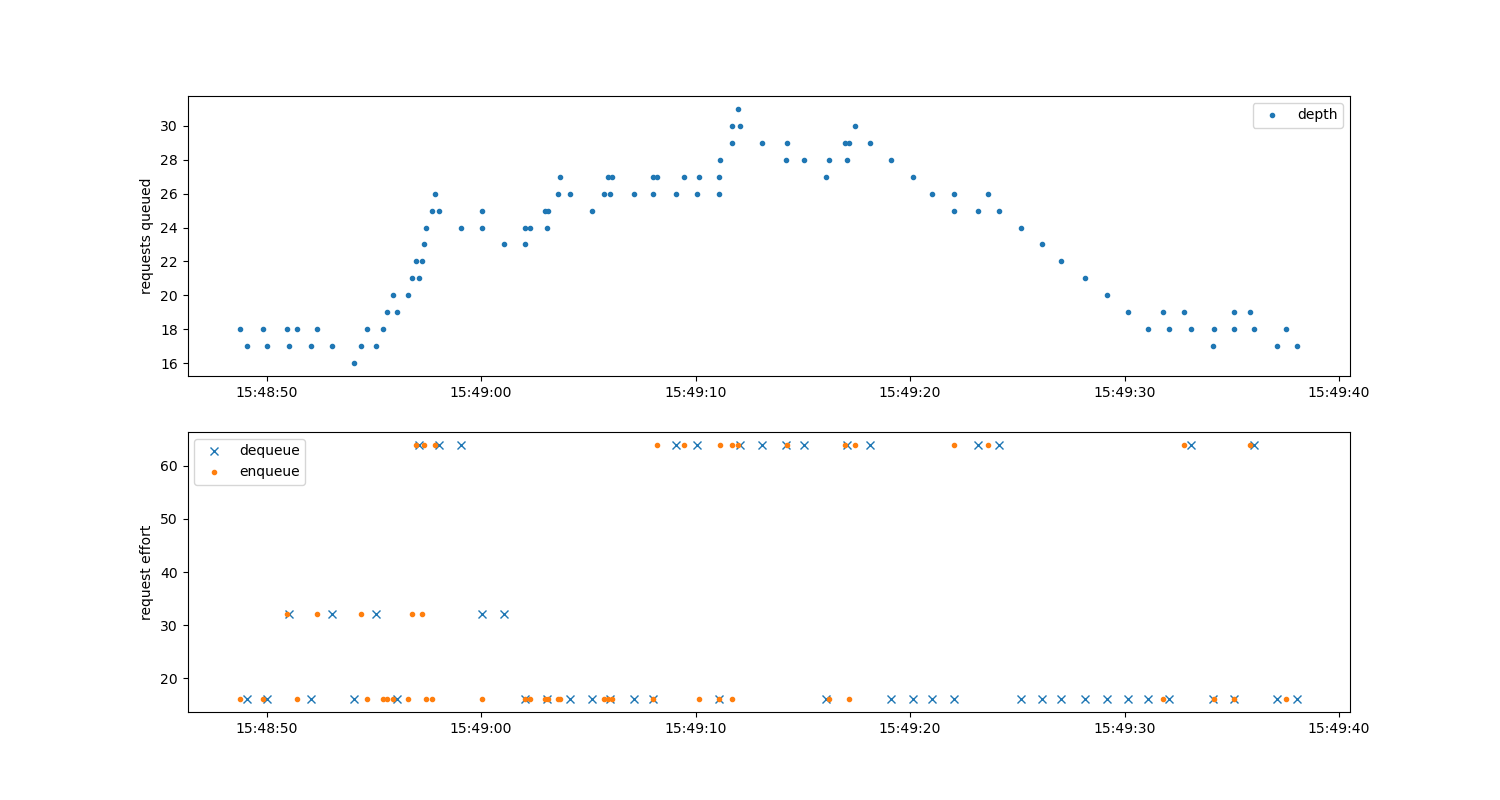

In [7]:
plotter(events[15000:15100])

In [8]:
plotter(events[16000:])

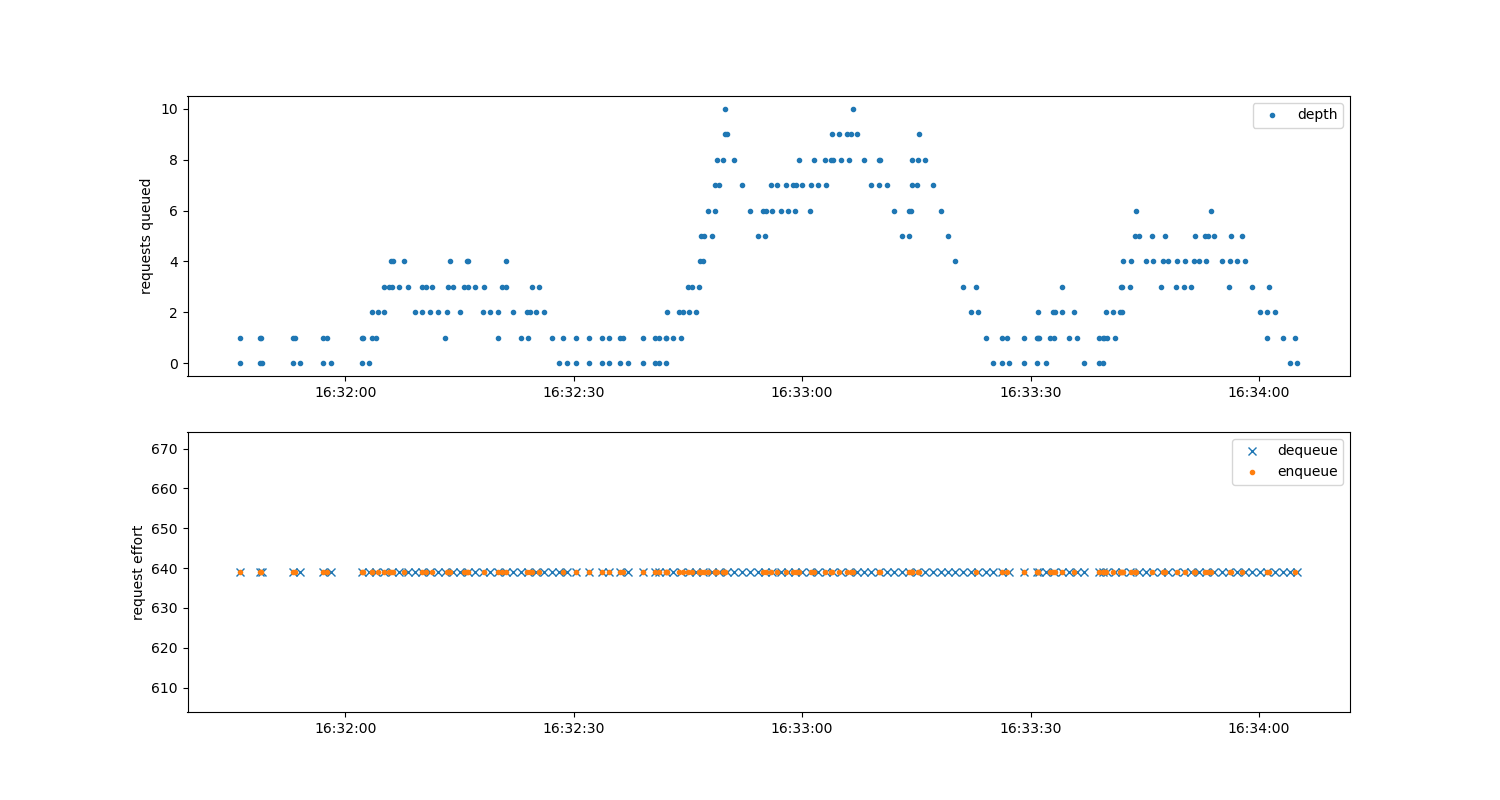

In [9]:
plotter(events[18189:])

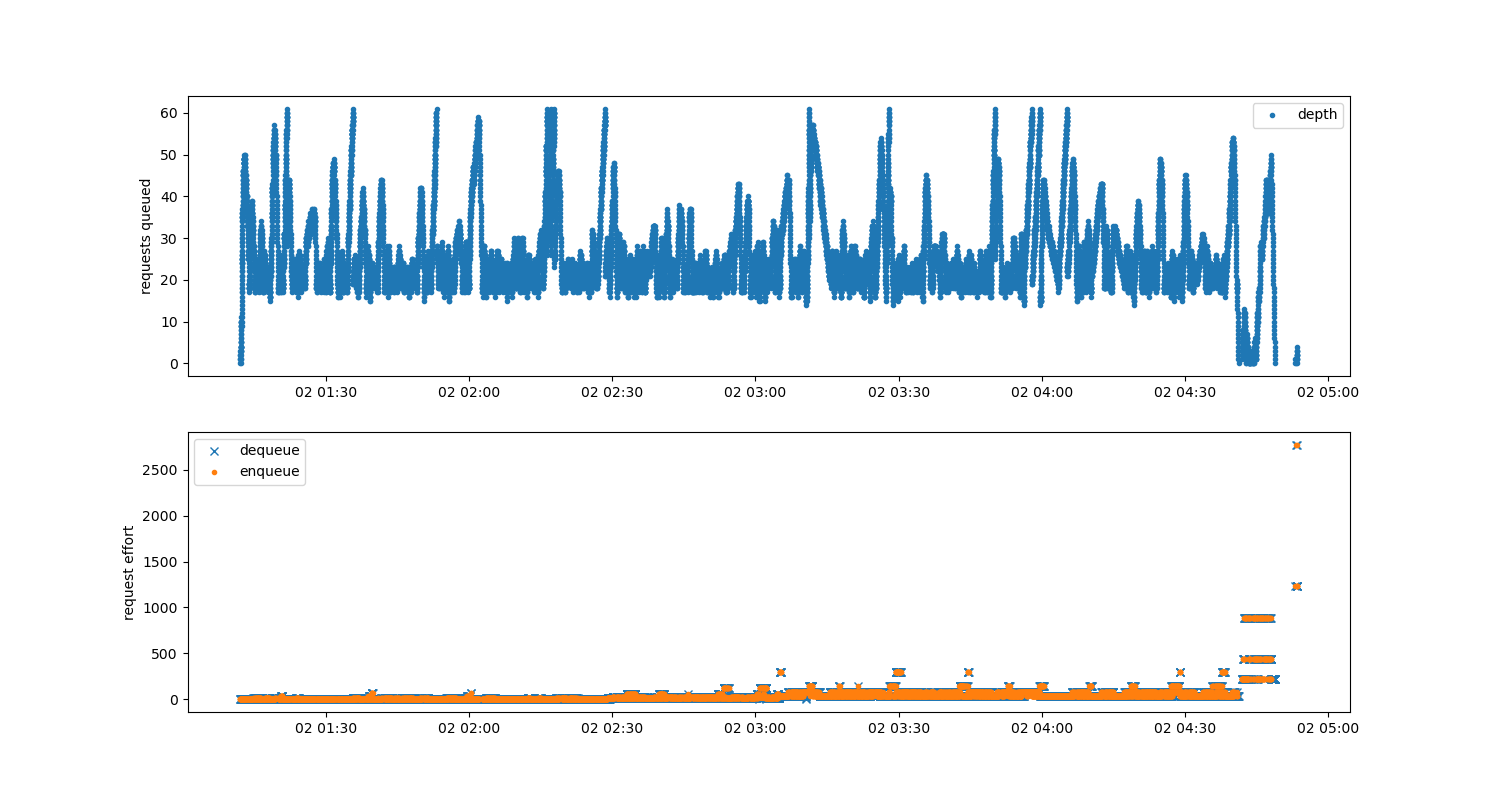

In [20]:
events = read_log("log-20230502-2")
plotter(events)

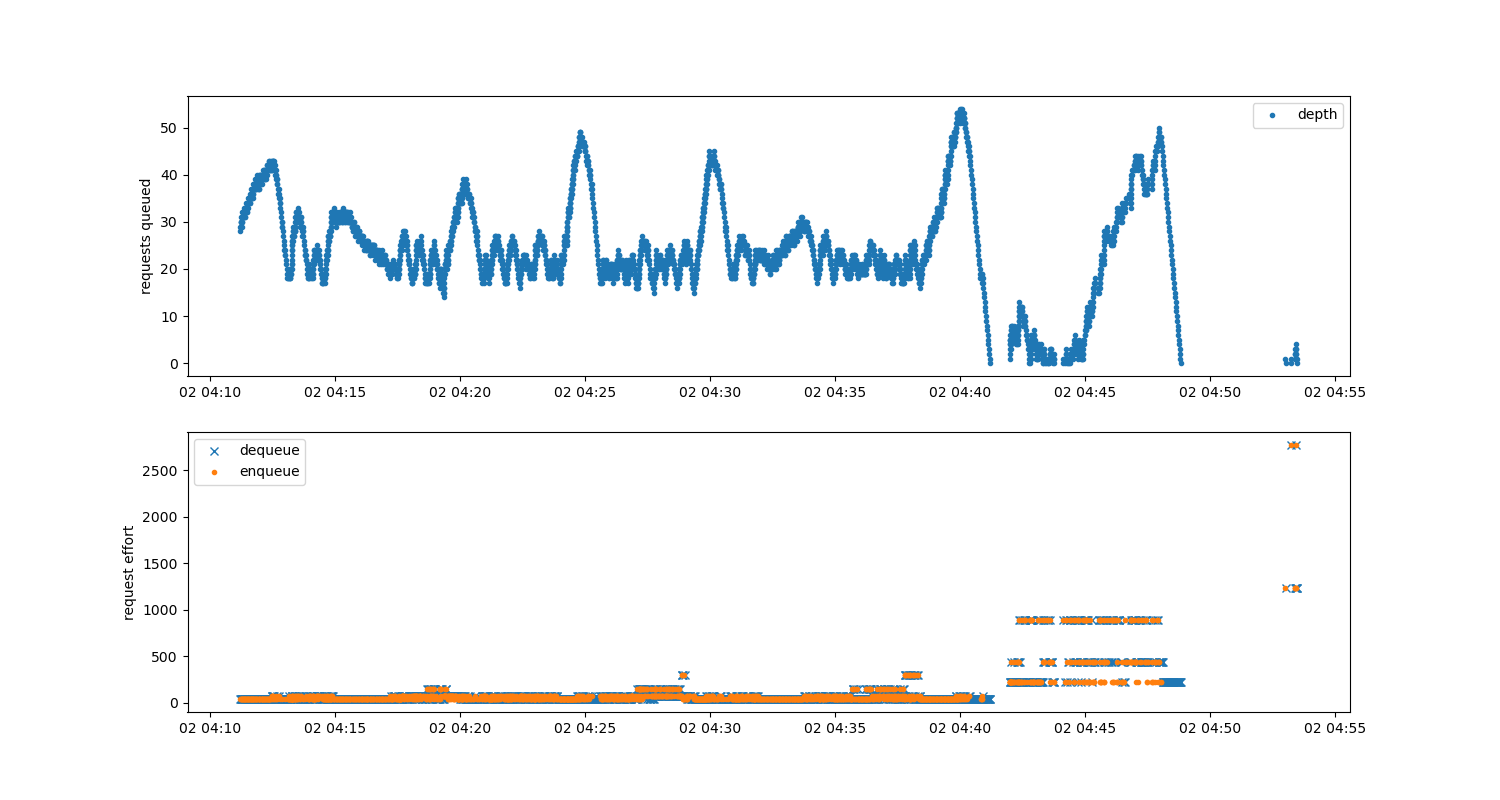

In [21]:
plotter(events[22000:])